*SIO221a Notes - Alford and Gille*

*Reading:  Bendat and Piersol, Ch. 5.2.5, 5.2.6, 9.2*

Concepts covered: Cross-covariance and cross-spectrum: error bars

# Lecture 17

*Recap*

Last time we took a general look at correlation (and correlation coefficients)
and their analog in spectral space:  coherence.  Coherence tells us
how effectively two time series resemble each other at any given 
frequency.

We defined the cross-spectrum:
\begin{equation}
\hat{S}_{XY}(f_m)= \frac{\langle X_m^* Y_m\rangle}{\Delta f}.
\end{equation}

This is complex:  the real part is the co-spectrum ($C(f)$) and the imaginary
part is the quadrature spectrum ($Q(f)$)---consistent with the terminology
we use to describe cosine and sine being "in quadrature" with each other.

From that, the squared coherence is:
\begin{equation}
\gamma_{xy}^2(f_k) = \frac{C^2(f_k) + Q^2(f_k)}{S_{xx}(f_k) S_{yy}(f_k)},
\end{equation}
where we needed $S_{xx}$, $S_{yy}$ and $S_{xy}$ to represent averages of
multiple segments.
The coherence is 1 if two data sets consistently oscillate in the same way
in all segments we consider.

The coherence phase is:
\begin{equation}
\phi(f_k) = \tan^{-1}(-Q(f_k)/C(f_k)),
\end{equation}
where $Q$ is the imaginary part of the co-spectrum $S_{xy}$,
and $C$ is the real part of the co-spectrum.
The phase 
tells us the timing difference between the two time series.  If $\phi = 0$,
changes in $x$ and $y$ happen at the same time.  If $\phi = \pi$, then
$x$ is at a peak when $y$ is at a trough.  And a value of $\phi=\pi/2$ or
$\phi=-\pi/2$ tells us that the records are a quarter cycle different.

Let's also make explicit something we didn't last time: namely, just as we learned in Lecture 13 that the autocovariance and the power spectrum are Fourier transform pairs, this is also true for the analogous quantities for two variables: the covariance and the cross spectrum:

$$ 
S_{xy}(f)=\int_{-\infty}^{\infty} R_{xy}(\tau)e^{-i2\pi f\tau} d\tau
$$
Now today we'll look at some more examples to gain a bit more intuition, and then to
figure out what is significant.

Let's make a fake dataset to demonstrate how to compute coherence and what they should look like.  We'll use white noise with where the two time series have a single known frequency in quadrature:

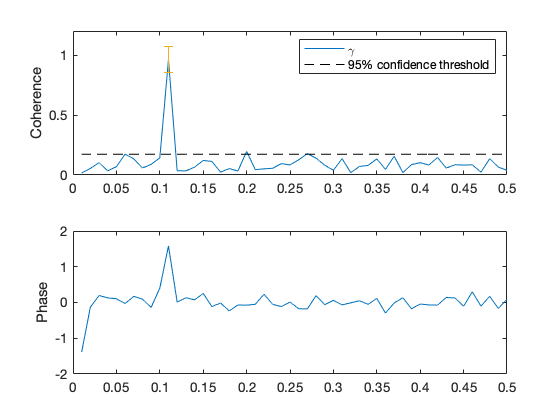

In [18]:
%Make two random datasets with a single known frequency in quadrature
nd=100;
a=randn(100,nd)+ cos(2*pi/10*(1:100)')*ones(1,nd);
b=randn(100,nd) + sin(2*pi/10*(1:100)')*ones(1,nd);

dt=1; %1-sec sample interval
df=1/100; %freq resolution is one over time series length
f=(1:50)*df;

fa=fft(detrend(a));
fb=fft(detrend(b));
fab=conj(fa).*fb;
faa=conj(fa).*fa;
fbb=conj(fb).*fb;

%Compute the cross-spectrum
cab=abs(mean(fab,2)) ./sqrt(abs(mean(faa,2)) .* abs(mean(fbb,2)));

%m=10;
%clear phase_c
%for i=1:1000/m
% phase_c(:,i)=atan2(-imag(mean(fab(:,(i-1)*m+1:i*m),2)),...
%      real(mean(fab(:,(i-1)*m+1:i*m),2)));
%end

%Compute the phase
phase_c=atan2(-imag(fab),real(fab));

%Compute errors to be discussed later
alpha=0.05; %MHA: check this expression. This is for 95% confidence.
gamma_threshold= sqrt(1-alpha^(1/(nd-1)));
gamma_threshold2=sqrt(sqrt(2).*(1-cab(1:50).^2)./cab(1:50)./sqrt(nd));

subplot(211)
plot(f,cab(1:50),f,gamma_threshold*ones(size(f)),'k--')
%Overplot error bars on the most significant coherence value
hold on
ig=find(cab(1:50)==max(cab(1:50)));
%errorbar(f,cab(1:50),gamma_threshold2)
errorbar(f(ig),cab(ig),gamma_threshold2(ig))
hold off
ylim([0 1.2])
legend('\gamma','95% confidence threshold')
ylabel('Coherence')

subplot(212)
plot(f,nanmean(phase_c(1:50,:),2))
ylabel('Phase')

#### Example:  Coherence and Wave Spectra 

Let's consider a real world example.  A number of years ago, students in the
first-year seminar on the Physics of Surfing took a pair of accelerometers 
out into the waves near the pier.  They used one as a free floater and the second
mounted onto a surfboard.
The accelerometers measured vertical and horizontal acceleration.

So let's see whether surfboard acceleration measurements show any
signs of coherence.
We'll start by comparing vertical and horizontal accelerations of
the free floating accelerometer, as shown in Figure 1:

![Pier acceleration time series](./images/wave_timeseries.png "Time series of vertical acceleration and x-axis
accleration for free-floating accelerometer near
Scripps pier")

These two records have rather different spectra as shown in
Figure 2.

![Pier acceleration spectra](./images/wave_spectra.png "Spectra for vertical and $x$ acceleration of free-floating
accelerometer near Scripps pier")

The two records are coherent, as shown in Figure 3,
with a phase difference of roughly $\pi$ radians, implying that they are
180$^o$ out of phase, at least at the frequencies at which they are
actually coherent.

![Pier acceleration coherence](./images/wave_coherence.png "(top) Coherence of vertical and $x$ acceleration of free-floating accelerometer near Scripps pier.
(bottom) Phase difference between vertical and $x$ acceleration components.")

In contrast, the vertical acceleration for the free floating accelerometer
is not coherent with vertical acceleration from the shortboard.

![Pier acceleration coherence - floating v shortboard](./images/wave_coherence2.png "(top) Coherence of vertical acceleration of free-floating
accelerometer versus shortboard accelerometer near Scripps pier.
(bottom) Phase difference.")

**Interpreting Phase**

Let's consider a little thought experiment.  What happens if you compute
coherence between two data sets which are essentially the same, aside from
a little noise, except that one is offset in time relative to the other.

We can first think a little, noting from before that if we have two time series $x(t)$ and $y(t)=x(t-\tau)$, their Fourier transforms differ only by $e^{2\pi f \tau}$.  That is, a time delay introduces a *phase shift* in the Fourier components. If we explicitly write this phase as $\theta = 2\pi f \tau$, we can see that phase for a simple time offset $\tau$ increases linearly with a slope $2\pi \tau$.

For example:

\begin{eqnarray}
a & = & \tau_i^x + n_i \\ 
b & = & \tau_{i+7}^x + m_i,
\end{eqnarray}
where $\tau_i^x$ is zonal wind at time step $i$, $n_i$ is one type of noise,
and $m_i$ is another noise that is uncorrelated with $n_i$.  Assuming the 
noise to be fairly small, what should the coherence and phase 
be between $a$ and $b$?

To figure this out, we can estimate the cross-spectrum:
\begin{equation}
S_{ab} = S_{\tau_i,\tau_{i+7}} + S_{\tau_i,m_i} + S_{\tau_{i+7},n_i} + S_{n_i,m_i}.
\end{equation}
Since the noise is uncorrelated with the data $\tau$ and uncorrelated with 
other noise, with a large enough sample this becomes:
\begin{equation}
S_{ab} \approx S_{\tau_i,\tau_{i+7}}.
\end{equation}
The wind $\tau$ is coherent with itself, albeit with a little phase lag,
so we expect to find:
\begin{equation}
\gamma^2 = \frac{|S_{ab}|^2}{S_{aa}S_{bb}} \approx  \frac{|S_{aa}|^2}{S_{aa}S_{aa}} = 1
\end{equation}
And the phase is 
\begin{equation}
\phi(f)=\mbox{atan2}(\Im{C_{ab}(f)},\Re{C_{ab}(f)}).
\end{equation}
In this case, the phase will simply reflect the 7 timestep shift between $a$ 
and $b$.  For a frequency of $n$ cycles per $N$ points, one cycle is $N/n$
time units, and the offset will represent a fraction of a cycle:  $7n/N$.  For
higher frequencies, the phase shift will represent a linearly increasing phase as shown above.

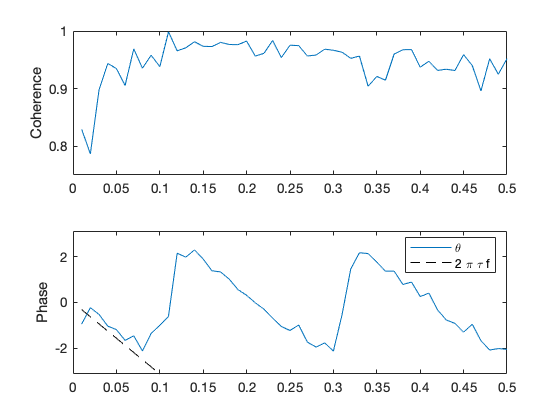

In [17]:
%Let's demonstrate using another time series that is offset by m samples.
m=2;
nd=10;
ct=randn(100+m,nd) + cos(2*pi/10*(1:(100+m))')*ones(1,nd);
a=ct(1:(end-m),:);
b=ct((m+1):end,:);

dt=1; %1-sec sample interval
df=1/100; %freq resolution is one over time series length
f=(1:50)*df;

fa=fft(detrend(a));
fb=fft(detrend(b));
fab=conj(fa).*fb;
faa=conj(fa).*fa;
fbb=conj(fb).*fb;

%Compute the cross-spectrum
cab=abs(mean(fab,2)) ./sqrt(abs(mean(faa,2)) .* abs(mean(fbb,2)));

%m=10;
%clear phase_c
%for i=1:1000/m
% phase_c(:,i)=atan2(-imag(mean(fab(:,(i-1)*m+1:i*m),2)),...
%      real(mean(fab(:,(i-1)*m+1:i*m),2)));
%end

%Compute the phase
phase_c=atan2(-imag(fab),real(fab));

%Compute errors to be discussed later
alpha=0.95;
gamma_threshold= sqrt(1-alpha^(1/(nd-1)));

subplot(211)
plot(f,cab(1:50))
ylabel('Coherence')
subplot(212)
plot(f,nanmean(phase_c(1:50,:),2),f,-(2*pi*m*dt).*f,'k--')
ylim([-pi pi])
legend('\theta','2 \pi \tau f')
ylabel('Phase')

**Coherence uncertainty**

No estimate is complete without an uncertainty.   We compute a significance level for coherence several ways.  The standard approach that we discussed previously is to set a threshold for evaluating whether a calculated coherence exceeds what we might expect from random white noise.
We started with the uncertainty for the squared coherence, $\gamma^2$:
\begin{equation}
\beta = 1 - \alpha^{1/(n_d-1)},
\end{equation}
where $n_d$ is the number of segments, $\alpha$ is the significance level and is
tyically 0.05 for a 95\% significance level
(see Thomson and Emery).
In Matlab, the threshold for $\gamma$ is:

In [76]:
alpha=0.95;
nd=1000;
gamma_threshold= sqrt(1-alpha^(1/(nd-1)))


gamma_threshold =

    0.0072



Which is overplotted in the examples above.  An alternate formulation is presented by Bendat and Piersol (Table 9.6), who
report the standard deviation of the squared coherence ($\gamma^2$) to be:
\begin{equation}
\delta_{\gamma_{xy}^2} = \frac{\sqrt{2}(1-\gamma_{xy}^2)}{|\gamma_{xy}| \sqrt{n_d}}.
\end{equation}
These are different metrics.  One tells us whether the derived
coherence is statistically different from zero; the second
evaluates the range of values that would be consistent with an
observed coherence.

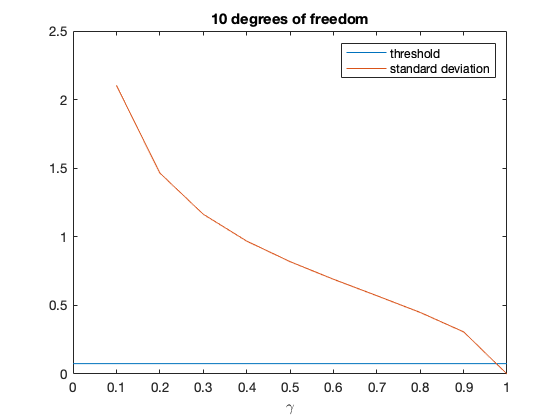

In [3]:
gamma=0:.1:1;
nd=10;
gamma_threshold= sqrt(1-alpha^(1/(nd-1)));
gamma_threshold2=sqrt(sqrt(2).*(1-gamma.^2)./gamma./sqrt(nd));
plot(gamma,ones(size(gamma))*gamma_threshold,gamma,gamma_threshold2)
title([num2str(nd) ' degrees of freedom'])
legend('threshold','standard deviation')
xlabel('\gamma')

**What is $n_d$?**

We have a formulation for coherence uncertainty that depends on the number 
of segments.  What if we want to use overlapping segments, just as we 
did for the Welch method?  You can test this through a Monte Carlo process. 
If you set $n_d$ equal to the total number of segments, ignoring the fact that
some overlap, your error bars will be visibly too small.  You can run 
Monte Carlo tests with overlapping segments to figure out how many effective
segments you really have.  And perhaps not surprisingly, the results
are equivalent to what we found in the Welch method (albeit scaled by
a factor of 2, since we're now counting segments and not degrees of freedom):


| Window Type | Equiv. # of segments |
| --- | ----------- |
| Boxcar | 2/3 |
| Triangle |  8/9 |
| Hanning |  18/19 $\approx$ 0.95 | 
| Hamming |  $\sim$0.90 | 

**Uncertainties of phase:  What do we believe?**

The phase difference that emerges from this is only relevant at the phase
where there is coherence energy, and in that case the phase is a quarter cycle different.  If we reverse the order of $x$ and $y$, we'll find negative phase, so a lead will turn into a lag.

First a little terminology.
Bendat and Piersol provide a good discussion of bias and uncertaintites
in spectral estimators.  As a starting point, the variance of the quantity
that we want to estimate is
\begin{equation}
\text{var}[\tilde{A}] = E[\tilde{A}^2]-A^2,
\end{equation}
where $A$ is the true value, and $\tilde{A}$ is the unbiased estimate (so
$E[\tilde{A}] = A$.
For spectral estimators we tend to talk about the normalized error:
\begin{equation}
\epsilon^2 = \frac{\text{var}{\tilde{A}}}{A^2}.
\end{equation}

Bendat and Piersol first derive relationships for the variance of
the spectrum and cross-spectrum in the case of one segment and two degrees
of freedom (see their appendix). They then note that
variance scales with $1/n$, where $n$ is the number of degrees of freedom,
so that variance can be inferred for spectra and cross-spectra with any
number of degrees of freedom (by dividing by $n_d$ the number of segments).

Phase error is sometimes reported as a standard error and sometimes as a 95\%
confidence range. 

Bendat and Piersol suggest the following as a standard error of the phase:
\begin{equation}
\text{std}\left[\phi_{xy}(f)\right] \approx \frac{\left[1-\gamma_{xy}^2(f)\right]^{1/2}}{\left|\gamma_{xy}(f)\right|\sqrt{2 n_d}}
\end{equation}

For a 95\% range, Hannon (1970) and Koopmans (1974) provide this expression:
\begin{equation}
\delta_\phi = \sin^{-1}\left[t_{\alpha,2n_d}
  \sqrt{\frac{1-\gamma_{xy}^2}{2n_d \gamma_{xy}^2}}\right]
\end{equation}
where $t_{\alpha,2n_d}$ is identified as the "Student t distribution", and
is actually the inverse of the Student t distribution ("tinv" in Matlab).
This is computed for $p$=0.95 to obtain a 95\% limit.

**Sidebar:  Deciphering phase errors from the textbooks**

If you plough through spectral analysis textbooks, you'll find a range of different
contradictory guidelines for phase errors.  Here's a quick synopsis, and some guidance 
for deciding what you trust.

The phase error can seem a little murky. One common formulation for phase uncertainty is:
\begin{equation}
\delta_\phi = \sin^{-1}\left[t_{\alpha,2n_d}
  \sqrt{\frac{1-\gamma_{xy}^2}{2n_d \gamma_{xy}^2}}\right] \hspace{0.5in} (1)
\end{equation}
where $t_{\alpha,2n_d}$ is identified as the "Student t distribution", and
is actually the inverse of the Student t distribution ("tinv" in Matlab).
Given an upper cut-off point of $\alpha/2 =0.975$ for the cdf of the t-distribution, we're looking for the corresponding value
of the function.    In case you have doubts, check Table A9.3 of Koopmans,
which shows, for example, that  $t(0.975,20)=2.086$.

But when we plot this up, for our white noise case, it seems to be a complex number, since we've ended up with some out of range values for the arcsine---perhaps this isn't surprising since the phase is ill-defined for white noise.  Bendat
and Piersol provide a different formulation, which has the virtue of producing a real number:
\begin{equation}
\text{std}\left[\phi_{xy}(f)\right] \approx \frac{\left[1-\gamma_{xy}^2(f)\right]^{1/2}}{\left|\gamma_{xy}(f)\right|\sqrt{2 n_d}}  \hspace{0.5in} (2)
\end{equation}

Zwiers and Von Storch quote Hannan (1970) (Hannan, 1970, *Multiple
Time Series*, John Wiley \& Sons, 536 pp.; see p. 257, equation 2.11)
and provide:
\begin{equation}
\delta_\phi = \sin^{-1}\left[t_{(1+p)/2,2n_d-2}
  \frac{\gamma_{xy}^{-2} -1}{2n_d -2}\right], \hspace{0.5in} (3)
 \end{equation}
where $p$ is the confidence interval (e.g. 0.95), so $(1+p)/2$ and $(1-p)/2$ provide the limits for $p$\% significance levels.
However, Zwiers and Von Storch have misquoted Hannan (1970), who actually
has a form equivalent to this:
\begin{equation}
\delta_\phi = \sin^{-1}\left[t_{(1+p)/2,2n_d-2}
  \left\{\frac{\gamma_{xy}^{-2} -1}{2n_d -2}\right\}^{1/2}\right], \hspace{0.5in} (4)
\end{equation}
which is exactly equivalent to Koopmans (1974).

The expressions are similar, though not identical.
Which is most appropriate? Let's return to our first example above, but let's compute phase in smaller chunks so we can look at the distribution.

In [6]:
%Go back to the first example above with the single sine wave in quadrature.
%Make two random datasets with a single known frequency in quadrature
nd=1000;
a=randn(100,nd)+ cos(2*pi/10*(1:100)')*ones(1,nd);
b=randn(100,nd) + sin(2*pi/10*(1:100)')*ones(1,nd);

dt=1; %1-sec sample interval
df=1/100; %freq resolution is one over time series length
f=(1:50)*df;

fa=fft(detrend(a));
fb=fft(detrend(b));
fab=conj(fa).*fb;
faa=conj(fa).*fa;
fbb=conj(fb).*fb;

%Compute the cross-spectrum
cab=abs(mean(fab,2)) ./sqrt(abs(mean(faa,2)) .* abs(mean(fbb,2)));

%This time we will compute phase in chunks so we can examine the std.
m=10;
clear phase_c
for i=1:1000/m
 phase_c(:,i)=atan2(-imag(mean(fab(:,(i-1)*m+1:i*m),2)),...
      real(mean(fab(:,(i-1)*m+1:i*m),2)));
end




ans =

    0.2424    0.0658    0.0101


std_phase_actual =

    0.0670



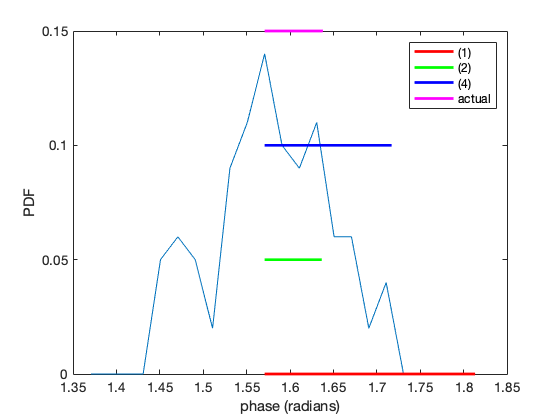

In [7]:
%Now let's compare the above expressions to the actual standard deviation of our phase estimates.

nd=m; %We averaged over m realizations.

%Equation (1)
delta_phase = asin(tinv(.95,2*nd)*...
  sqrt((1-abs(cab).^2)./(abs(cab).^2*sqrt(2*nd))));
  
%Bendat and Piersol
delta_phase2 = sqrt((1-cab.^2)./(abs(cab).^2*2*nd));

%Zwiers - incorrect
delta_phase3 = asin(tinv(.975,2*nd-2)*(1 ./cab.^2-1)/(2*nd-2));
%Zwiers - correct, and Koopmans:
delta_phase4 = asin(tinv(.975,2*nd-2)*sqrt( (1 ./cab.^2-1)/(2*nd-2) ));
% compare results
[delta_phase(11) delta_phase2(11) delta_phase3(11)]
std_phase_actual=std(phase_c(11,:))

v=pi/2+(-.2:.02:.2);
%v=0:.1:6;
h=hist(phase_c(11,:),v);

plot(v,h/sum(h))
hold on
h=plot(pi/2+[0 delta_phase(11)],[0 0],'r-',...
    pi/2+[0 delta_phase2(11)],[0.05 0.05],'g-',...
    pi/2+[0 delta_phase4(11)],[0.1 0.1],'b-',...
    pi/2+[0 std_phase_actual],[0.15 0.15],'m-');set(h,'linewidth',2)
legend(h,'(1)','(2)','(4)','actual')
ylabel('PDF')
xlabel('phase (radians)')
hold off

It's clear from these tests that (a) the distribution of the
phases should be roughly Gaussian, but it isn't exactly Gaussian; 
(b) Bendat and Piersol's
representation for the standard
deviation of the phase (delta\_phase2) is relatively reliable; (c) the
inverse sine formulations should produce phase errors representing the 95th
percentile.  If we plug in 0.68 in place of 0.95 for the Koopmans
formulation above, we'll get results consistent with the Bendat and Piersol
and Monte Carlo results.

So the bottom line is:

1. If you want a one standard deviation error bar, the Bendat and Piersol formula is pretty good.

2. If you want to be a little more accurate, and especially if you want an error bar representing a 95\% probability band, then it's probably better to use the formula from Koopmans.


Here's a final example of why this matters.  In Alford and Gregg 2001, we found a near-inertial wave that also seemed to have turbulence once per near-inertial period. But was it significant?

![Time/depth series of shear and dissipation rate from Alford and Gregg 2001.](./images/ag01_timeseries.png "Time/depth series of shear and dissipation rate in the Banda Sea.")

There were not a lot of wave cycles included in the data, so error bars were important:

![Time/Coherence and phase of shear and dissipation rate from Alford and Gregg 2001.](./images/ag01_coherence.png "Coherence and phase.")
